<a href="https://colab.research.google.com/github/udayanagani/Heart-attack-prediction-model/blob/main/Copy_of_Untitled17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

### Import Libraries

In [43]:
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf

### Data Load


In [2]:
data=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

### Data Understanding

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
data.shape

(1470, 35)

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
data.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [9]:
data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [10]:
data.duplicated().sum()

0

### Handle Missing Values

In [ ]:
# Impute missing values with the mean
X_train.fillna(X_train.mean(), inplace=True)

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [ ]:
numerical_cols = data.select_dtypes(include=['float64']).columns
for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)

In [11]:
data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


### Encoding

In [12]:
# Example function to classify columns
def classify_columns(data):
    ordinal_columns = {}
    nominal_columns = []

    for col in data.select_dtypes(include=['object']).columns:
        unique_vals = data[col].nunique()

        # Assuming fewer than 10 unique values could be ordinal (manual review needed)
        if unique_vals <= 10:
            # Manual review required to confirm if they are ordinal
            print(f"Check if '{col}' should be ordinal")
            # For example, you could categorize these manually based on domain knowledge
            # ordinal_columns[col] = <order>
        else:
            nominal_columns.append(col)

    return ordinal_columns, nominal_columns

ordinal_cols, nominal_cols = classify_columns(data)

print("Ordinal Columns:", ordinal_cols)
print("Nominal Columns:", nominal_cols)

Check if 'Attrition' should be ordinal
Check if 'BusinessTravel' should be ordinal
Check if 'Department' should be ordinal
Check if 'EducationField' should be ordinal
Check if 'Gender' should be ordinal
Check if 'JobRole' should be ordinal
Check if 'MaritalStatus' should be ordinal
Check if 'Over18' should be ordinal
Check if 'OverTime' should be ordinal
Ordinal Columns: {}
Nominal Columns: []


In [14]:
# List of ordinal columns (make sure this matches the actual columns in your DataFrame)
ordinal_columns = [
    'Attrition',
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus',
    'Over18',
    'OverTime'
]

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply label encoding to each ordinal column
for column in ordinal_columns:
    if column in data.columns:
        data[column] = le.fit_transform(data[column])

# Display the first few rows of the DataFrame after encoding
print(data.head())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                

In [15]:
data.dtypes

,0
Age,int64
Attrition,int64
BusinessTravel,int64
DailyRate,int64
Department,int64
DistanceFromHome,int64
Education,int64
EducationField,int64
EmployeeCount,int64
EmployeeNumber,int64


### Standardizing

In [23]:
#features = imputedData.columns.drop(['Loan_Status']).tolist()
features = data.columns.drop(['Attrition']).tolist()
#features = imputedData.columns.drop(['Loan_Status','Dependents_3+','ApplicantIncome','Self_Employed']).tolist()

y = data['Attrition']
X = data[features]
#print(y)
#print(X)

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(train_X)
# X_test_scaled = scaler.transform(val_X)

# Normalization
scaler = MinMaxScaler().set_output(transform="pandas")
X_normalized = scaler.fit_transform(X)

X_normalized.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Feature Selection and Engineering

### Correlation

In [18]:
# calculating and visualizing correlation of each feature with the target value
corr_matrix = data.corr()
corr_with_target = corr_matrix['Attrition'].sort_values(ascending=False)
print(corr_with_target)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

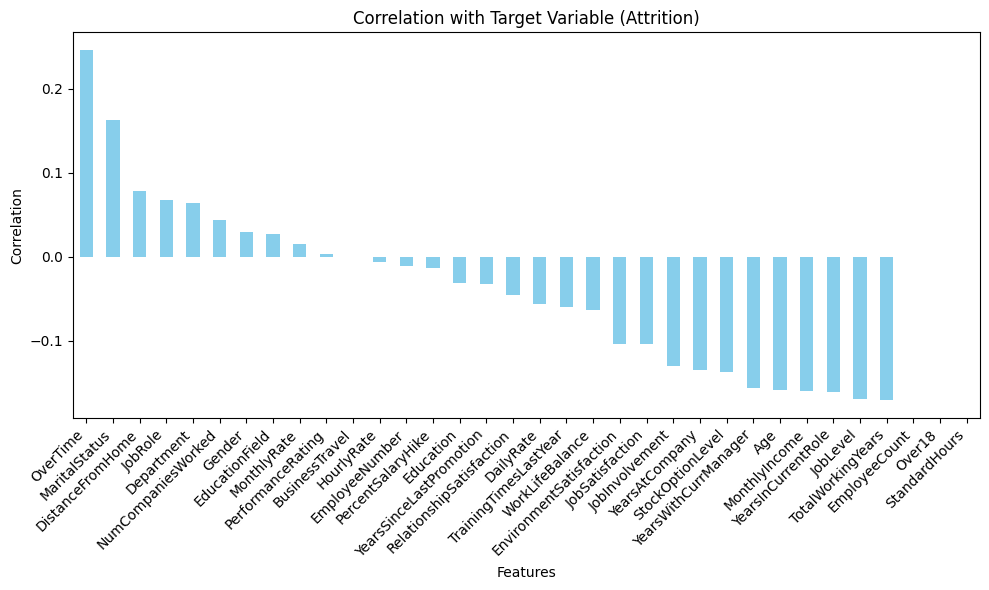

In [19]:
plt.figure(figsize=(10, 6))
corr_with_target.drop('Attrition').plot(kind='bar', color='skyblue')
plt.title('Correlation with Target Variable (Attrition)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## feature selection

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace infinite values with NaN and handle them
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.mean(), inplace=True)

# Create a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE and select the number of features to keep (e.g., 3)
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X_train, y_train)

# Get the ranking of features
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
print("Features ranked by RFE:")
print(feature_ranking.sort_values('Ranking'))

Features ranked by RFE:
                     Feature  Ranking
2                  dailyrate        1
18               monthlyrate        1
17             monthlyincome        1
8             employeenumber        2
0                        age        3
11                hourlyrate        4
27         totalworkingyears        5
4           distancefromhome        6
30            yearsatcompany        7
21                  overtime        8
22         percentsalaryhike        9
19        numcompaniesworked       10
14                   jobrole       11
26          stockoptionlevel       12
32   yearssincelastpromotion       13
33      yearswithcurrmanager       14
15           jobsatisfaction       15
28     trainingtimeslastyear       16
9    environmentsatisfaction       17
31        yearsincurrentrole       18
12            jobinvolvement       19
13                  joblevel       20
24  relationshipsatisfaction       21
6             educationfield       22
29           worklifebalan

# Model Selection and Building

### Random Forest model

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, random_state = 10 ,test_size=0.3)

In [32]:
# Create and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Random Forest Model Evaluation:
Accuracy: 0.8253968253968254
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       357
           1       0.77      0.12      0.21        84

    accuracy                           0.83       441
   macro avg       0.80      0.56      0.55       441
weighted avg       0.82      0.83      0.77       441



## XGBoost model

In [33]:
# Create and fit the XGBoost model without use_label_encoder
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("XGBoost Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print(classification_report(y_test, xgb_predictions))

XGBoost Model Evaluation:
Accuracy: 0.8390022675736961
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       357
           1       0.68      0.30      0.41        84

    accuracy                           0.84       441
   macro avg       0.76      0.63      0.66       441
weighted avg       0.82      0.84      0.81       441



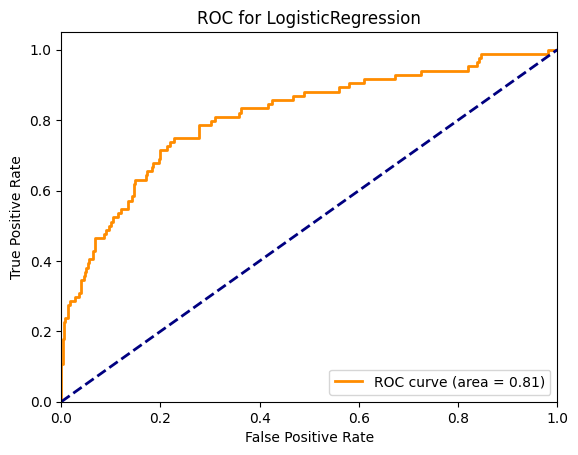

In [51]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Predict probabilities for the positive class (1)
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for LogisticRegression')
plt.legend(loc="lower right")
plt.show()

## logistic reggressor

In [42]:
AttritionPred_model = LogisticRegression()

AttritionPred_model.fit(X_train, y_train)

LogisticRegression()

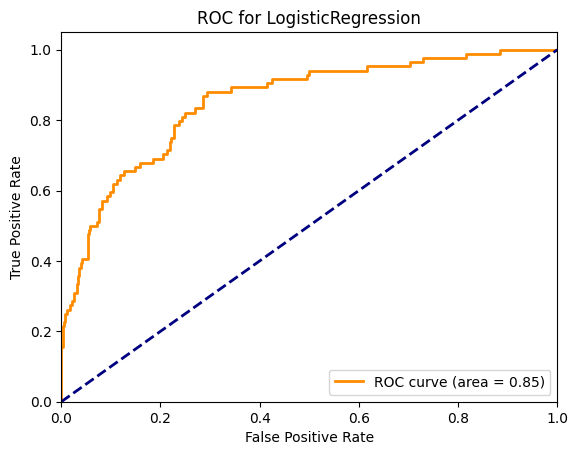

In [50]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Predict probabilities for the positive class (1)
y_prob = AttritionPred_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for LogisticRegression')
plt.legend(loc="lower right")
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]            # Minimum number of samples required to split an internal node
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  # 5-fold cross-validation
                           verbose=1,
                           n_jobs=-1)  # Use all available cores

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
rf_predictions = best_rf_model.predict(X_test)

# Print evaluation metrics
print("Random Forest Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.86
Random Forest Model Evaluation on Test Set:
Accuracy: 0.8253968253968254
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       357
           1       0.77      0.12      0.21        84

    accuracy                           0.83       441
   macro avg       0.80      0.56      0.55       441
weighted avg       0.82      0.83      0.77       441



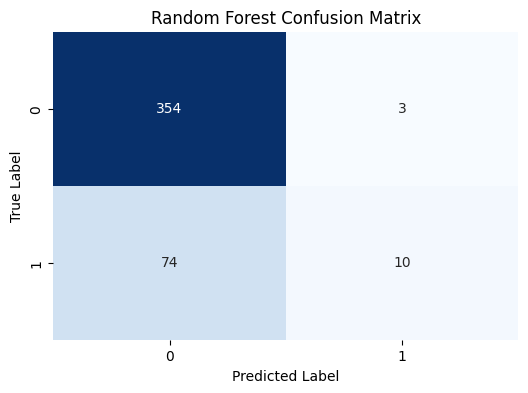

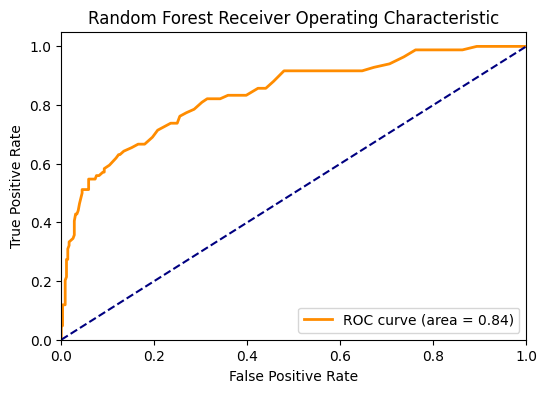

In [35]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Make predictions and predicted probabilities for Random Forest
rf_predictions = best_rf_model.predict(X_test)
rf_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_predictions)

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### confusion matrices and visualizations

In [44]:
val_predictions = AttritionPred_model.predict(X_test)
print(mean_absolute_error(y_test, val_predictions))

0.15192743764172337


In [45]:
# Validating using confusion metrix
conf_matrix = confusion_matrix(y_test, val_predictions.astype(int))  #accuracy of prediction
print("Confusion Matrix:")
print(conf_matrix)

# Extract True Positive, False Positive, True Negative, False Negative from the confusion matrix
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

# Compute accuracy, precision, recall, and F1 score
accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Confusion Matrix:
[[353   4]
 [ 63  21]]
Accuracy: 0.8480725623582767
Precision: 0.84
Recall: 0.25
F1 Score: 0.3853211009174312


In [55]:
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME explainer
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Stayed', 'Attrition'], discretize_continuous=True)

# Choose an instance to explain (e.g., the first in X_test)
i = 0
exp = explainer.explain_instance(X_test.values[i], xgb_model.predict_proba)

# Show explanation
exp.show_in_notebook(show_table=True)


In [66]:
y_train_nn = to_categorical(y_train)
y_test_nn = to_categorical(y_test)

# Create the Neural Network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(2, activation='softmax'))  # Assuming binary classification

# Compile the model
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
nn_model.fit(X_train, y_train_nn, epochs=10, batch_size=32, verbose=1)

# Make predictions
nn_predictions_prob = nn_model.predict(X_test)
nn_predictions = np.argmax(nn_predictions_prob, axis=1)  # Get class with highest probability

# Evaluate the model
print("Neural Network Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, nn_predictions))
print(classification_report(y_test, nn_predictions))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6171 - loss: 0.6125
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8393 - loss: 0.4318
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8496 - loss: 0.3918
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8351 - loss: 0.4035
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8522 - loss: 0.3605
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8655 - loss: 0.3389
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8541 - loss: 0.3587
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8788 - loss: 0.3204
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8761 - loss: 0.2998
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8933 - loss: 0.3232
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Neural Network Model Evaluation:
Accuracy: 0.8435374149659864
              precision    recall  f1-score   support

           0 

In [68]:
# Convert y to categorical for binary classification
y_categorical = to_categorical(y)

# Function to create the model
def create_model(learning_rate=0.01, num_hidden_layers=1, num_units=64, input_dim=None):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  # Input layer using Input shape
    model.add(Dense(num_units, activation='relu'))

    # Add additional hidden layers if specified
    for _ in range(num_hidden_layers - 1):
        model.add(Dense(num_units, activation='relu'))

    model.add(Dense(2, activation='softmax'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameter grid
learning_rates = [0.001, 0.01, 0.1]
num_hidden_layers_options = [1, 2, 3]
num_units_options = [32, 64, 128]

# Perform cross-validation
for learning_rate in learning_rates:
    for num_hidden_layers in num_hidden_layers_options:
        for num_units in num_units_options:
            print(f'Training model with lr={learning_rate}, layers={num_hidden_layers}, units={num_units}')
            skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            fold_accuracies = []

            for train_index, val_index in skf.split(X, y):
                X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
                y_train_fold, y_val_fold = y_categorical[train_index], y_categorical[val_index]  # Ensure y_val_fold is used for validation

                # Train the model
                model = create_model(learning_rate, num_hidden_layers, num_units, input_dim=X.shape[1])
                model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=10, verbose=0)

                # Validate the model
                y_val_pred = model.predict(X_val_fold)
                y_val_pred_classes = np.argmax(y_val_pred, axis=1)  # Get class with highest probability
                fold_accuracy = accuracy_score(np.argmax(y_val_fold, axis=1), y_val_pred_classes)  # Compare with validation labels
                fold_accuracies.append(fold_accuracy)

            print(f'Fold accuracies: {fold_accuracies}')
            print(f'Mean accuracy for lr={learning_rate}, layers={num_hidden_layers}, units={num_units}: {np.mean(fold_accuracies)}')

Training model with lr=0.001, layers=1, units=32
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold accuracies: [0.7755102040816326, 0.8367346938775511, 0.8299319727891157, 0.6326530612244898, 0.8401360544217688]
Mean accuracy for lr=0.001, layers=1, units=32: 0.7829931972789115
Training model with lr=0.001, layers=1, units=64
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold accuracies: [0.826530612244898, 0.4523809523809524, 0.8469387755102041, 0.7108843537414966, 0.8401360544217688]
Mean accuracy for lr=0.001, layers=1, units=64: 0.735374149659864
Training model with lr=0.001, layers=1, units=128
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━

KeyboardInterrupt: 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


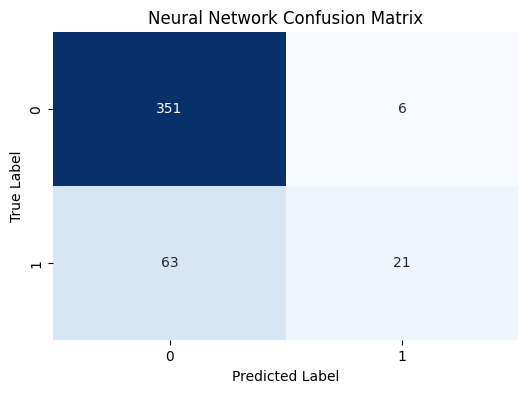

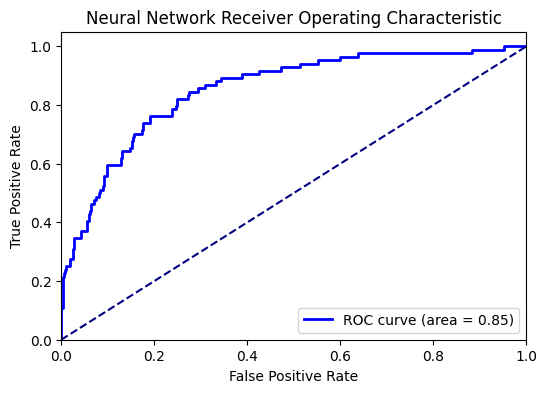

Neural Network Model Evaluation:
Accuracy: 0.8435374149659864
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       357
           1       0.78      0.25      0.38        84

    accuracy                           0.84       441
   macro avg       0.81      0.62      0.64       441
weighted avg       0.83      0.84      0.81       441



In [69]:
# Assuming you've already split your data into train and test sets (X_train, X_test, y_train, y_test)
# Convert y_test to categorical if necessary
y_test_nn = to_categorical(y_test)  # If `y_test` is not already categorical

# Neural Network predictions (after training)
nn_predictions_prob = nn_model.predict(X_test)  # Predict probabilities
nn_predictions = np.argmax(nn_predictions_prob, axis=1)  # Get the predicted class (highest probability)

# Confusion Matrix for Neural Network
cm_nn = confusion_matrix(np.argmax(y_test_nn, axis=1), nn_predictions)

# Plot Confusion Matrix for Neural Network
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(np.argmax(y_test_nn, axis=1), nn_predictions_prob[:, 1])
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(6, 4))
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_nn))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print classification report for Neural Network
print("Neural Network Model Evaluation:")
print("Accuracy:", accuracy_score(np.argmax(y_test_nn, axis=1), nn_predictions))
print(classification_report(np.argmax(y_test_nn, axis=1), nn_predictions))

In [70]:
print("accuracy score: ", round(accuracy_score(val_y, val_predictions) * 100, 2), "%")

accuracy score:  84.81 %


In [71]:
import joblib
joblib.dump(xgb_model, 'xgb_attrition_model.pkl')

['xgb_attrition_model.pkl']

# Model

In [ ]:
'''import joblib

# Save the Random Forest model to a file
joblib.dump(best_rf_model, 'random_forest_model.pkl')

# To load the model later
loaded_rf_model = joblib.load('random_forest_model.pkl')'''


In [ ]:
# Save the Neural Network model in the new Keras format
'''nn_model.save('neural_network_model.keras')

# To load the model later
from tensorflow.keras.models import load_model
loaded_nn_model = load_model('neural_network_model.keras')'''

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [75]:
!jupyter nbconvert --to html Copy_of_Untitled17.ipynb

[NbConvertApp] Converting notebook Copy_of_Untitled17.ipynb to html
[NbConvertApp] Writing 2357780 bytes to Copy_of_Untitled17.html
